# What is the Optimal Skill to Learn for Data Analysts?
Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualise median salary vs percent skill demand
3. (Optimal) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [3]:
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])
df_DA_UK_exploded = df_DA_UK.explode('job_skills')
df_DA_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [4]:
df_DA_skills = df_DA_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skills_count', 'median': 'median_salary'})

df_DA_skills

DA_job_count = len(df_DA_UK)

df_DA_skills['skills_percent'] = df_DA_skills['skills_count']/DA_job_count * 100

skills_percent = 6

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skills_percent'] > skills_percent]


df_DA_skills_high_demand


,skills_count,median_salary,skills_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
outlook,6,53857.0,8.333333


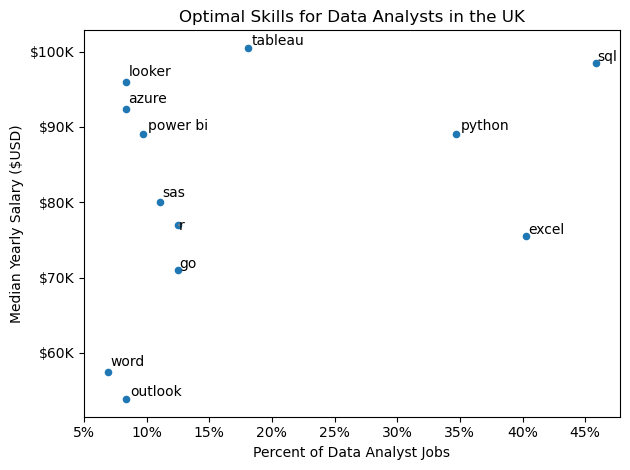

In [5]:
from adjustText import adjust_text
import matplotlib.ticker as ticker

df_DA_skills_high_demand.plot(kind='scatter', x='skills_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

# Formatting the y-axis to include $ and K
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Formatting the x-axis to include %
from matplotlib.ticker import PercentFormatter
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Optimal Skills for Data Analysts in the UK')
plt.tight_layout()

plt.show()

In [6]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [7]:
df_technology = df['job_type_skills'].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove NaN values
df_technology = df_technology.dropna()

# Combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)   # convert string to dictionary
    for key, value in row_dict.items(): 
        if key in technology_dict:     # If key already exist in technology_dict, add value to existing
            technology_dict[key] += value
        else:                          # If key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] =  list(set(value))       

technology_dict     

{'analyst_tools': ['microstrategy',
  'power bi',
  'cognos',
  'visio',
  'qlik',
  'powerpoint',
  'sharepoint',
  'ms access',
  'nuix',
  'msaccess',
  'sheets',
  'ssrs',
  'sap',
  'dax',
  'looker',
  'excel',
  'spreadsheet',
  'ssis',
  'esquisse',
  'sas',
  'word',
  'powerbi',
  'spss',
  'splunk',
  'tableau',
  'outlook',
  'alteryx',
  'datarobot'],
 'programming': ['html',
  'c++',
  'golang',
  'scala',
  'go',
  'objective-c',
  'elixir',
  'julia',
  'ocaml',
  'sass',
  'lisp',
  'typescript',
  'visual basic',
  'kotlin',
  'erlang',
  'c#',
  'crystal',
  'powershell',
  'mongodb',
  'nosql',
  'assembly',
  'css',
  't-sql',
  'no-sql',
  'rust',
  'vba',
  'clojure',
  'fortran',
  'perl',
  'cobol',
  'pascal',
  'bash',
  'matlab',
  'swift',
  'haskell',
  'sql',
  'f#',
  'c',
  'delphi',
  'lua',
  'python',
  'visualbasic',
  'sas',
  'r',
  'solidity',
  'dart',
  'apl',
  'java',
  'ruby',
  'shell',
  'javascript',
  'groovy',
  'php',
  'mongo',
  'vb.

In [8]:
# convert to Dataframe with 2 columns - technolgy and skills
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

# explode the skills column
df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,microstrategy
0,analyst_tools,power bi
0,analyst_tools,cognos
0,analyst_tools,visio
0,analyst_tools,qlik
...,...,...
9,sync,mattermost
9,sync,microsoft teams
9,sync,unify
9,sync,webex


In [9]:
# We can now merge with our previous dataframe (df_DA_skills_high_demand)
df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

,skills_count,median_salary,skills_percent,technology,skills
0,33,98500.0,45.833333,programming,sql
1,29,75550.0,40.277778,analyst_tools,excel
2,25,89100.0,34.722222,programming,python
3,13,100500.0,18.055556,analyst_tools,tableau
4,9,77017.5,12.500000,programming,r
5,9,71000.0,12.500000,programming,go
6,8,80007.0,11.111111,analyst_tools,sas
7,8,80007.0,11.111111,programming,sas
8,7,89100.0,9.722222,analyst_tools,power bi
9,6,53857.0,8.333333,analyst_tools,outlook


In [10]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

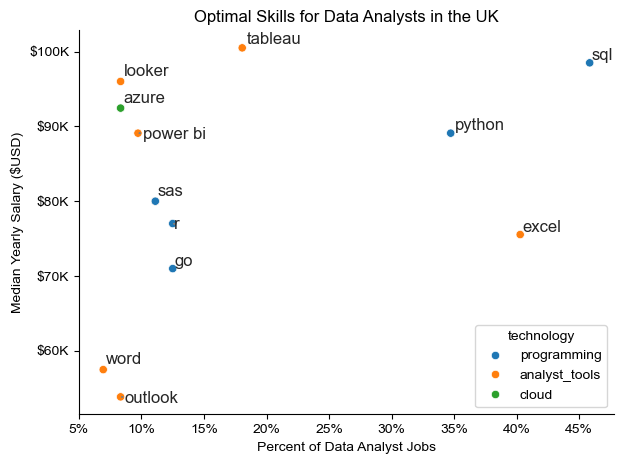

In [11]:
# df_plot.plot(kind='scatter', x='skills_percent', y='median_salary')
# We comment out the above matplotlib command because we want to use seaborn for better output
sns.scatterplot(
   data=df_plot,
   x='skills_percent',
   y='median_salary',
   hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skills_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

# Formatting the y-axis to include $ and K
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Formatting the x-axis to include %
from matplotlib.ticker import PercentFormatter
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Optimal Skills for Data Analysts in the UK')
plt.tight_layout()

plt.show()